<a href="https://colab.research.google.com/github/MehraeenTimas/nlp-course/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install requests beautifulsoup4 gensim matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 29.2 MB/s eta 0:00:00


In [2]:
import requests, re
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
url = "https://trtfarsi.com"
html = requests.get(url, timeout=10).text
soup = BeautifulSoup(html, "html.parser")

titles, links = [], []
for a in soup.select("span a,div a,span, .title a,div,a")[:5]:
    #link = urljoin(url, a["href"])
    title = a.get_text(strip=True)
    titles.append(title)
    links.append(links)

texts = []
for L in links:
    try:
        p = BeautifulSoup(requests.get(L, timeout=8).text, "html.parser")
        para = p.find("p")
        texts.append(para.get_text(strip=True)[:250] if para else "")
    except:
        texts.append("")

raw_text = " ".join(titles + texts)
print(f"۵ خبر از TRT فارسی: {len(titles)} تا")

۵ خبر از TRT فارسی: 5 تا


In [4]:
# حذف کلمات مزاحم + پاکسازی
stop_extra = ["برای", "اعلام", "شود", "کرد", "است", "از", "در", "به"]
clean_text = re.sub(r'[^آ-ی\s]', ' ', raw_text)           # فقط حروف فارسی
clean_text = re.sub(r'\s+', ' ', clean_text).strip()     # فاصله‌ها درست
for word in stop_extra:
    clean_text = clean_text.replace(f" {word} ", " ")    # حذف دقیق

In [5]:
tokens = simple_preprocess(clean_text)
tokens = [t for t in tokens if t not in STOPWORDS and len(t) > 2]

In [6]:
nouns = [t for t in tokens if len(t) > 3]


In [7]:
print("\n۵ اسم پرتکرار:")
for w, c in Counter(nouns).most_common(5):
    print(f"   {w} → {c} بار")




۵ اسم پرتکرار:
   ترکیه → 26 بار
   دفاعی → 14 بار
   خارجه → 12 بار
   افغانستان → 11 بار
   امور → 10 بار


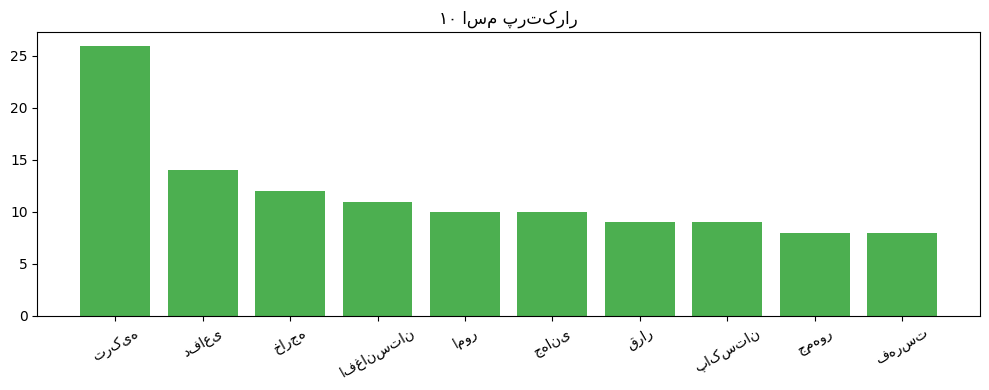

In [8]:

!apt-get -qq install fonts-vazir > /dev/null 2>&1
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams["font.family"] = "Vazir"

top10 = Counter(nouns).most_common(10)
plt.figure(figsize=(10,4))
if top10:
    w, c = zip(*top10)
    plt.bar(w, c, color="#4CAF50")
    plt.title("۱۰ اسم پرتکرار")
else:
    plt.text(0.5, 0.5, "هیچ اسمی نبود!", ha='center', fontsize=20)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()